<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Assignment No. 3</h1></center>

<b>Mudra Verma</b>  
<b>Banner ID: B00932103</b>  


### 1. Task 1<a id='top'></a>

**Data Transformation**<a href='#1'>[1]</a>

In [14]:
#### Checking for missing values or duplicate rows ####

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

train_data = pd.read_csv('/content/drive/MyDrive/sign_mnist_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/sign_mnist_test.csv')

# Check for missing values
missing_values = train_data.isnull().sum()
print("Missing Values in Training Data:\n", missing_values[missing_values > 0])

missing_values = test_data.isnull().sum()
print("Missing Values in Test Data:\n", missing_values[missing_values > 0])

# Check for duplicate rows
duplicate_rows = train_data[train_data.duplicated()]
print("\nDuplicate Rows in Training Data:\n", duplicate_rows)

duplicate_rows = test_data[test_data.duplicated()]
print("\nDuplicate Rows in Test Data:\n", duplicate_rows)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing Values in Training Data:
 Series([], dtype: int64)
Missing Values in Test Data:
 Series([], dtype: int64)

Duplicate Rows in Training Data:
 Empty DataFrame
Columns: [label, pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9, pixel10, pixel11, pixel12, pixel13, pixel14, pixel15, pixel16, pixel17, pixel18, pixel19, pixel20, pixel21, pixel22, pixel23, pixel24, pixel25, pixel26, pixel27, pixel28, pixel29, pixel30, pixel31, pixel32, pixel33, pixel34, pixel35, pixel36, pixel37, pixel38, pixel39, pixel40, pixel41, pixel42, pixel43, pixel44, pixel45, pixel46, pixel47, pixel48, pixel49, pixel50, pixel51, pixel52, pixel53, pixel54, pixel55, pixel56, pixel57, pixel58, pixel59, pixel60, pixel61, pixel62, pixel63, pixel64, pixel65, pixel66, pixel67, pixel68, pixel69, pixel70, pixel71, pixel72, pixel73, pixel74, pixel75, pixel76, pixel77, pixel

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Separate labels and pixel values for training data
labels_train = train_data['label']
pixels_train = train_data.drop('label', axis=1)

# Apply Min-Max scaling to normalize pixel values to the range [0, 1] for training data
scaler = MinMaxScaler()
pixels_normalized_train = scaler.fit_transform(pixels_train)

# Combine normalized pixel values with labels for training data
train_normalized = pd.DataFrame(data=pixels_normalized_train, columns=pixels_train.columns)
train_normalized['label'] = labels_train

# Display the head of the normalized training data
print("Head of Normalized Training Data:")
print(train_normalized.head())

# Separate labels and pixel values for test data
labels_test = test_data['label']
pixels_test = test_data.drop('label', axis=1)

# Apply Min-Max scaling to normalize pixel values to the range [0, 1] for test data
pixels_normalized_test = scaler.transform(pixels_test)

# Combine normalized pixel values with labels for test data
test_normalized = pd.DataFrame(data=pixels_normalized_test, columns=pixels_test.columns)
test_normalized['label'] = labels_test

# Display the head of the normalized test data
print("\nHead of Normalized Test Data:")
print(test_normalized.head())


Head of Normalized Training Data:
     pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
0  0.419608  0.462745  0.498039  0.525490  0.545098  0.560784  0.572549   
1  0.607843  0.615686  0.611765  0.611765  0.611765  0.615686  0.611765   
2  0.733333  0.737255  0.737255  0.733333  0.733333  0.729412  0.733333   
3  0.827451  0.827451  0.831373  0.831373  0.827451  0.823529  0.827451   
4  0.643137  0.654902  0.666667  0.674510  0.690196  0.701961  0.705882   

     pixel8    pixel9   pixel10  ...  pixel776  pixel777  pixel778  pixel779  \
0  0.588235  0.600000  0.611765  ...  0.811765  0.811765  0.811765  0.807843   
1  0.619608  0.619608  0.615686  ...  0.584314  0.501961  0.341176  0.368627   
2  0.737255  0.733333  0.729412  ...  0.788235  0.784314  0.780392  0.776471   
3  0.823529  0.823529  0.827451  ...  0.917647  0.913725  0.905882  0.901961   
4  0.721569  0.725490  0.729412  ...  0.411765  0.411765  0.423529  0.521569   

   pixel780  pixel781  pixel782  p

**Descriptive Analysis** :

Normalization is performed on the MNIST image dataset, as well as on many other image datasets, for several reasons related to improving the performance and convergence of machine learning models. Here are some key reasons for normalizing pixel values in the MNIST dataset:
1. Stability of Training: Normalization ensures that the pixel values are within a similar numerical range. This helps in stabilizing and accelerating the training process of machine learning models.
2. Model Generalization: Normalization can improve the generalization ability of a model. By bringing all pixel values into a standard range, the model becomes less sensitive to variations in the input data. This is especially important for datasets like MNIST, where the lighting conditions or contrast of the images may vary.

### 2. K-means algorithm to Sign Language MNIST dataset

In [8]:
#### Loading Training and Test Dataset ####

from sklearn.model_selection import train_test_split

X_train = train_normalized.drop('label', axis=1)
y_train = train_normalized['label']

X_test = test_normalized.drop('label', axis=1)
y_test = test_normalized['label']

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (27455, 784)
Shape of X_test: (7172, 784)
Shape of y_train: (27455,)
Shape of y_test: (7172,)


#### i) Subtask 2.a Changing the number of clusters from 10 to 200 with the step size of 10. Then displaying the performance of the algorithm based on accuracy and object function value i.e. inertia for each cluster number

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics

accuracy_values = []
inertia_values = []

# Vary the number of clusters from 10 to 200 with a step size of 10
cluster_range = range(10, 201, 10)

for n_clusters in cluster_range:
    # Fit the k-means model
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans.fit(X_train)

    # Predict cluster labels
    labels_pred = kmeans.predict(X_train)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_train, labels_pred)
    accuracy_values.append(accuracy)

    # Get the inertia (objective function) value
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Print results for each cluster
    print(f"Number of Clusters: {n_clusters}")

Number of Clusters: 10
Number of Clusters: 20
Number of Clusters: 30
Number of Clusters: 40
Number of Clusters: 50
Number of Clusters: 60
Number of Clusters: 70
Number of Clusters: 80
Number of Clusters: 90
Number of Clusters: 100
Number of Clusters: 110
Number of Clusters: 120
Number of Clusters: 130
Number of Clusters: 140
Number of Clusters: 150
Number of Clusters: 160
Number of Clusters: 170
Number of Clusters: 180
Number of Clusters: 190
Number of Clusters: 200


In [ ]:
# Display results in a loop
for n_clusters, accuracy, inertia in zip(cluster_range, accuracy_values, inertia_values):
    print(f"Number of Clusters: {n_clusters}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Inertia: {inertia:.4f}")
    print("=" * 40)

Number of Clusters: 10
Accuracy: 0.0181
Inertia: 437794.1753
Number of Clusters: 20
Accuracy: 0.0456
Inertia: 390335.5290
Number of Clusters: 30
Accuracy: 0.0172
Inertia: 365172.2416
Number of Clusters: 40
Accuracy: 0.0127
Inertia: 346205.8627
Number of Clusters: 50
Accuracy: 0.0118
Inertia: 332812.8682
Number of Clusters: 60
Accuracy: 0.0172
Inertia: 321078.7701
Number of Clusters: 70
Accuracy: 0.0256
Inertia: 311594.3318
Number of Clusters: 80
Accuracy: 0.0050
Inertia: 302682.6792
Number of Clusters: 90
Accuracy: 0.0177
Inertia: 294028.7371
Number of Clusters: 100
Accuracy: 0.0149
Inertia: 288429.5588
Number of Clusters: 110
Accuracy: 0.0051
Inertia: 281369.7509
Number of Clusters: 120
Accuracy: 0.0069
Inertia: 275014.0705
Number of Clusters: 130
Accuracy: 0.0063
Inertia: 268108.2226
Number of Clusters: 140
Accuracy: 0.0076
Inertia: 263450.2367
Number of Clusters: 150
Accuracy: 0.0186
Inertia: 258435.0747
Number of Clusters: 160
Accuracy: 0.0118
Inertia: 254192.1604
Number of Cluster

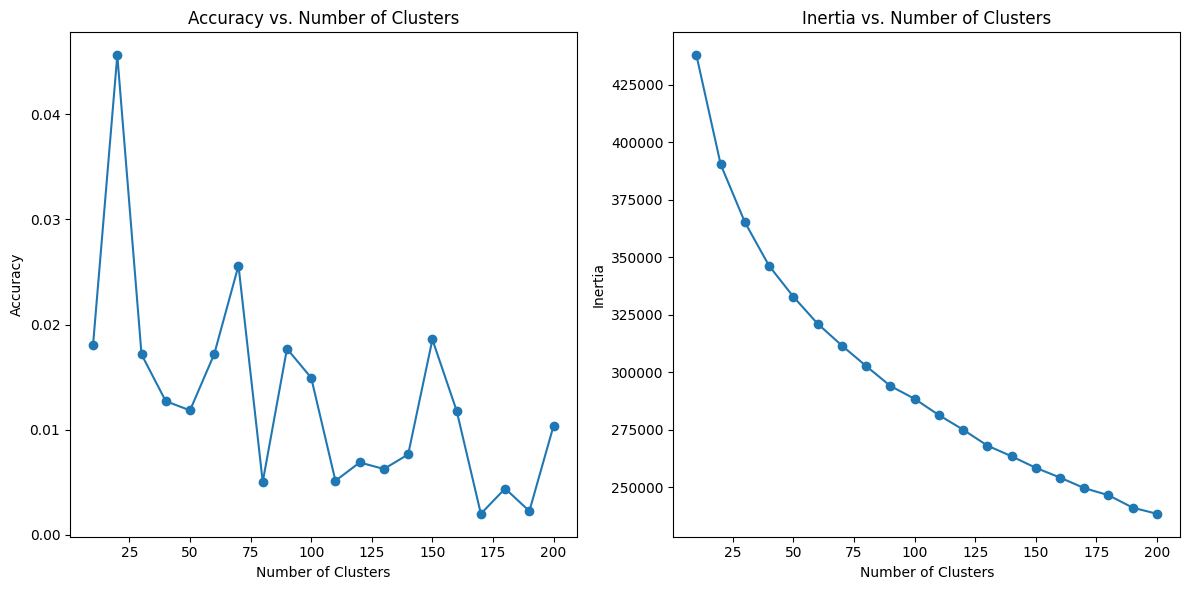

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy and inertia values for different numbers of clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, accuracy_values, marker='o')
plt.title('Accuracy vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')

# Plot inertia values
plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

#### i) Subtask 2.b Optimal number of clusters and model trained on optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


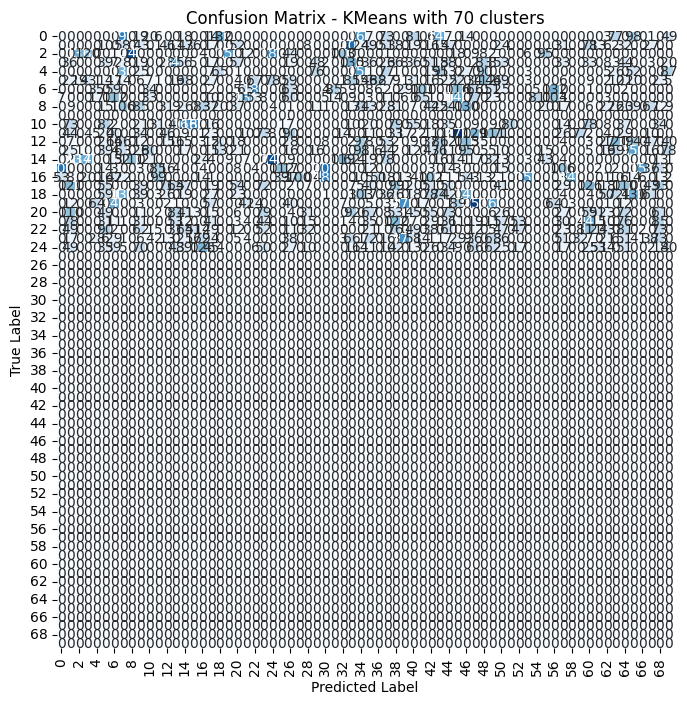

Training Accuracy with 70 clusters: 0.0097
Inertia with 70 clusters: 313003.3520
Training Recall with 70 clusters: 0.0097
Training F1 Score with 70 clusters: 0.0147


In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'Cluster' column from X_train if it exists
X_train = X_train.drop('Cluster', axis=1, errors='ignore')

# Set the number of clusters
n_clusters = 70

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
kmeans.fit(X_train)

# Predict cluster labels
labels_pred = kmeans.predict(X_train)

# Compute confusion matrix
conf_matrix_kmeans = confusion_matrix(y_train, labels_pred)

# Calculate additional metrics
accuracy_kmeans = accuracy_score(y_train, labels_pred)
inertia_kmeans = kmeans.inertia_
recall_kmeans = recall_score(y_train, labels_pred, average='weighted')
f1_kmeans = f1_score(y_train, labels_pred, average='weighted')

# Save confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_kmeans, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - KMeans with {n_clusters} clusters")
plt.savefig("confusion_matrix_kmeans.png")
plt.show()

# Display additional metrics
print(f"Training Accuracy with {n_clusters} clusters: {accuracy_kmeans:.4f}")
print(f"Inertia with {n_clusters} clusters: {inertia_kmeans:.4f}")
print(f"Training Recall with {n_clusters} clusters: {recall_kmeans:.4f}")
print(f"Training F1 Score with {n_clusters} clusters: {f1_kmeans:.4f}")


After observing the accuracy and inertia (objective function value) for each configuration of the number of clusters from 10 to 200 with a step size of 10. I observed that 70 clusters had the highest accuracy among others. The objective function value was also high along with the recall. I also decided to use the elbow curve which did not help me much but I figured there was a slight bent near 50-75 clusters on the basis of inertia and hence decided to use 70 as the optimal number of clusters.

### 3. Fuzzy K-means algorithm to Sign Language MNIST dataset

#### a) Subtask 3.a Change the number of clusters from 10 to 200 with the step size of 10. Show the performance of the algorithm based on accuracy and the objective function value for each cluster number.

In [ ]:
import pandas as pd
import numpy as np
from skfuzzy.cluster import cmeans
from sklearn import metrics

accuracy_values = []
inertia_values = []

# Vary the number of clusters from 10 to 200 with a step size of 10
cluster_range = range(10, 201, 10)

for n_clusters in cluster_range:
    # Fit the Fuzzy K-means model
    cntr, u, u0, d, jm, p, fpc = cmeans(np.transpose(X_train.values), c=n_clusters, m=2, error=0.005, maxiter=1000, init=None, seed=42)

    # Predict cluster labels
    labels_pred = np.argmax(u, axis=0)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_train, labels_pred)
    accuracy_values.append(accuracy)

    # Calculate inertia (use fuzzy partition coefficient fpc as an approximation)
    inertia_values.append(fpc)

    # Print results for each cluster
    print(f"Number of Clusters: {n_clusters}")


Number of Clusters: 10
Number of Clusters: 20
Number of Clusters: 30
Number of Clusters: 40
Number of Clusters: 50
Number of Clusters: 60
Number of Clusters: 70
Number of Clusters: 80
Number of Clusters: 90
Number of Clusters: 100
Number of Clusters: 110
Number of Clusters: 120
Number of Clusters: 130
Number of Clusters: 140
Number of Clusters: 150
Number of Clusters: 160
Number of Clusters: 170
Number of Clusters: 180
Number of Clusters: 190
Number of Clusters: 200


In [ ]:
# Display results in a loop
for n_clusters, accuracy, inertia in zip(cluster_range, accuracy_values, inertia_values):
    print(f"Number of Clusters: {n_clusters}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Inertia: {inertia:.4f}")
    print("=" * 40)

Number of Clusters: 10
Accuracy: 0.0472
Inertia: 0.1000
Number of Clusters: 20
Accuracy: 0.0376
Inertia: 0.0500
Number of Clusters: 30
Accuracy: 0.0368
Inertia: 0.0333
Number of Clusters: 40
Accuracy: 0.0137
Inertia: 0.0250
Number of Clusters: 50
Accuracy: 0.0126
Inertia: 0.0200
Number of Clusters: 60
Accuracy: 0.0123
Inertia: 0.0167
Number of Clusters: 70
Accuracy: 0.0126
Inertia: 0.0143
Number of Clusters: 80
Accuracy: 0.0124
Inertia: 0.0125
Number of Clusters: 90
Accuracy: 0.0124
Inertia: 0.0111
Number of Clusters: 100
Accuracy: 0.0009
Inertia: 0.0100
Number of Clusters: 110
Accuracy: 0.0009
Inertia: 0.0091
Number of Clusters: 120
Accuracy: 0.0004
Inertia: 0.0083
Number of Clusters: 130
Accuracy: 0.0003
Inertia: 0.0077
Number of Clusters: 140
Accuracy: 0.0003
Inertia: 0.0071
Number of Clusters: 150
Accuracy: 0.0004
Inertia: 0.0067
Number of Clusters: 160
Accuracy: 0.0003
Inertia: 0.0063
Number of Clusters: 170
Accuracy: 0.0003
Inertia: 0.0059
Number of Clusters: 180
Accuracy: 0.0005

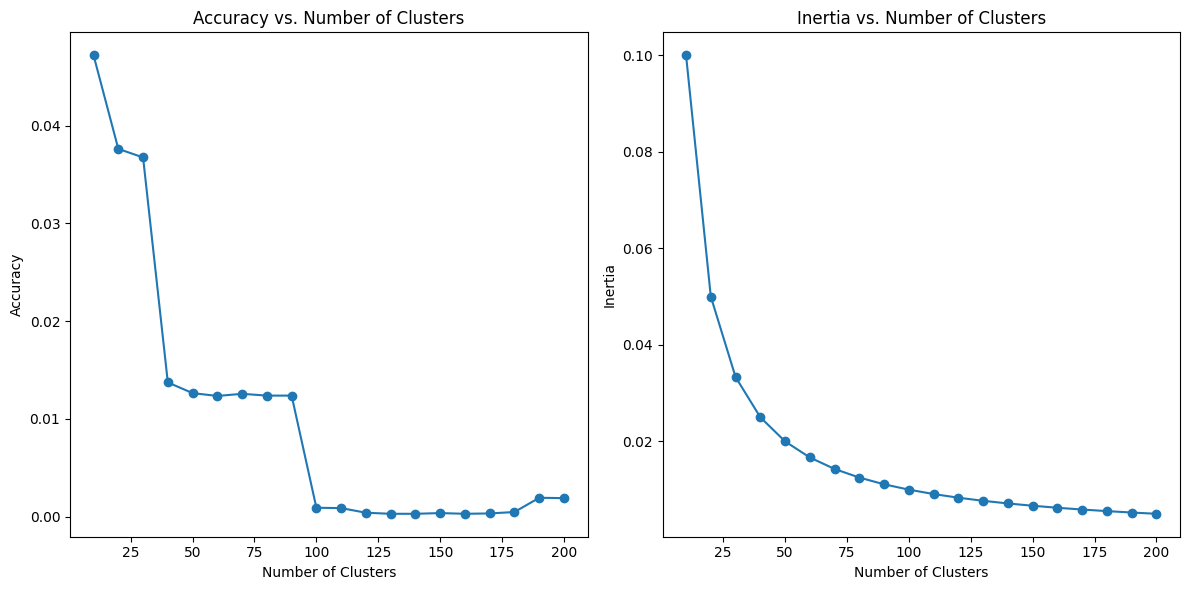

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy and inertia values for different numbers of clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, accuracy_values, marker='o')
plt.title('Accuracy vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')

# Plot inertia values
plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

#### b) Subtask 3.b Performance of the algorithm based on accuracy and the objective function value by changing the fuzzifier value from 1 to 5 with the step size of 1.

In [ ]:
import pandas as pd
import numpy as np
from skfuzzy.cluster import cmeans
from sklearn import metrics

fuzzifier_values = np.arange(1, 6, 1)
cluster_count = 30

for fuzzifier in fuzzifier_values:
    # Fit the Fuzzy K-means model
    cntr, u, u0, d, jm, p, fpc = cmeans(np.transpose(X_train.values), c=cluster_count, m=fuzzifier, error=0.005, maxiter=1000, init=None, seed=42)

    # Predict cluster labels
    labels_pred = np.argmax(u, axis=0)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_train, labels_pred)

    # Calculate inertia (use fuzzy partition coefficient fpc as an approximation)
    inertia = fpc

    # Print results for each fuzzifier value
    print(f"Fuzzifier Value: {fuzzifier}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Inertia: {inertia:.4f}")
    print("=" * 40)


/usr/local/lib/python3.10/dist-packages/skfuzzy/cluster/_cmeans.py:33: RuntimeWarning: divide by zero encountered in divide
  u = normalize_power_columns(d, - 2. / (m - 1))


Fuzzifier Value: 1
Accuracy: 0.0467
Inertia: 1.0000
Fuzzifier Value: 2
Accuracy: 0.0368
Inertia: 0.0333
Fuzzifier Value: 3
Accuracy: 0.0367
Inertia: 0.0333
Fuzzifier Value: 4
Accuracy: 0.0366
Inertia: 0.0333
Fuzzifier Value: 5
Accuracy: 0.0366
Inertia: 0.0333


After observing the elbow point and comparing the values of accuracy and objective function I summaried that the ideal number of clusters is 30. Similarly the optimal fuzzier value is 1. However a fuzzifier value slightly greater than 1 can make the clustering algorithm less sensitive to noise or outliers, potentially leading to more robust clusters I kept the value to 1.2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


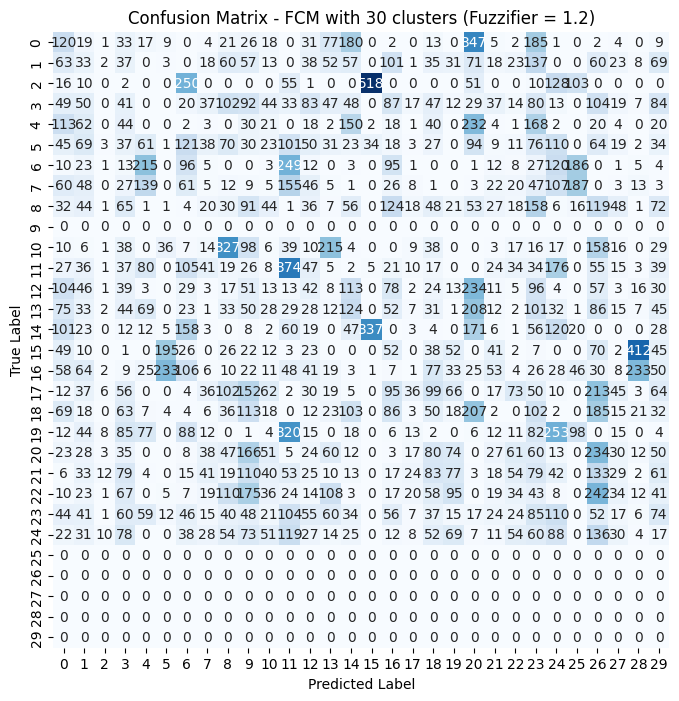

Accuracy: 0.0410
Recall: 0.0410
F1 Score: 0.0403


In [13]:
import pandas as pd
import numpy as np
from skfuzzy.cluster import cmeans
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Set the number of clusters and fuzzifier value
n_clusters = 30
fuzzifier = 1.2

# Fit the Fuzzy C-means model
cntr, u, u0, d, jm, p, fpc = cmeans(np.transpose(X_train.values), c=n_clusters, m=fuzzifier, error=0.005, maxiter=1000, init=None, seed=42)

# Predict cluster labels
labels_pred = np.argmax(u, axis=0)

# Compute confusion matrix
conf_matrix_fcm = confusion_matrix(y_train, labels_pred)

# Calculate additional metrics
accuracy_fcm = accuracy_score(y_train, labels_pred)
recall_fcm = recall_score(y_train, labels_pred, average='weighted')
f1_fcm = f1_score(y_train, labels_pred, average='weighted')

# Display the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_fcm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - FCM with {n_clusters} clusters (Fuzzifier = {fuzzifier})")
plt.savefig("confusion_matrix_fcm.png")
plt.show()

# Display additional metrics
print(f"Accuracy: {accuracy_fcm:.4f}")
print(f"Recall: {recall_fcm:.4f}")
print(f"F1 Score: {f1_fcm:.4f}")


#### c) Subtask 3.c Comparing k-means and FCM based on the results achieved.

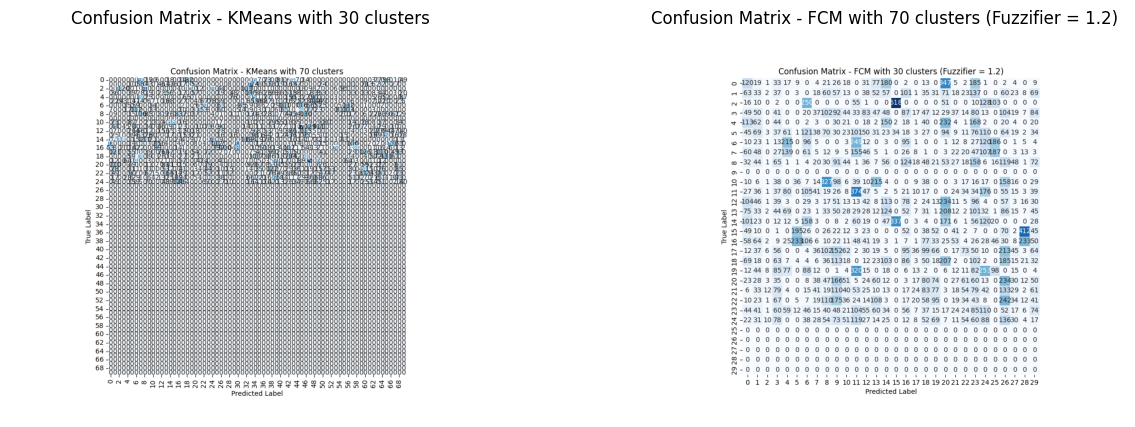

     Metric    KMeans       FCM
0  Accuracy  0.009725  0.040976
1    Recall  0.009725  0.040976
2  F1 Score  0.014683  0.040333


In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the saved confusion matrix images
img_path_kmeans = "confusion_matrix_kmeans.png"
img_path_fcm = "confusion_matrix_fcm.png"

img_kmeans = mpimg.imread(img_path_kmeans)
img_fcm = mpimg.imread(img_path_fcm)

# Display the confusion matrix images
plt.figure(figsize=(15, 5))

# KMeans Confusion Matrix
plt.subplot(1, 2, 1)
plt.imshow(img_kmeans)
plt.axis('off')  # Turn off axis labels
plt.title(f"Confusion Matrix - KMeans with 30 clusters")

# FCM Confusion Matrix
plt.subplot(1, 2, 2)
plt.imshow(img_fcm)
plt.axis('off')  # Turn off axis labels
plt.title(f"Confusion Matrix - FCM with 70 clusters (Fuzzifier = 1.2)")

plt.show()

# Display additional metrics in a table
metrics_data = {
    'Metric': ['Accuracy', 'Recall', 'F1 Score'],
    'KMeans': [accuracy_kmeans, recall_kmeans, f1_kmeans],
    'FCM': [accuracy_fcm, recall_fcm, f1_fcm]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)


Accuracy: Both KMeans and FCM have low accuracy, with FCM performing slightly better.
Recall: The recall values are also low for both methods, with FCM showing a slight improvement.
F1 Score: The F1 score for KMeans is higher than that of FCM.

Conclusion: As portrayed it seems both Kmeans and FCM have limilations in capturing the essence of the data due to low metrics.

### 4. Implement a feedforward neural network and train the network

In [23]:
####  ####

import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape input data to have the shape (None, 28, 28, 1)
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.values.reshape(-1, 28, 28, 1)

# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))  # 24 classes in Sign-MNIST

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/10
687/687 [==============================] - 23s 30ms/step - loss: 1.2841 - accuracy: 0.6477 - val_loss: 0.4000 - val_accuracy: 0.9100
Epoch 2/10
687/687 [==============================] - 17s 25ms/step - loss: 0.2057 - accuracy: 0.9619 - val_loss: 0.0945 - val_accuracy: 0.9918
Epoch 3/10
687/687 [==============================] - 17s 25ms/step - loss: 0.0509 - accuracy: 0.9976 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 4/10
687/687 [==============================] - 17s 25ms/step - loss: 0.0171 - accuracy: 0.9998 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 5/10
687/687 [==============================] - 17s 25ms/step - loss: 0.0083 - accuracy: 0.9999 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 17s 25ms/step - loss: 0.0045 - accuracy: 0.9999 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 7/10
687/687 [==============================] - 16s 23ms/step - loss: 0.0051 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy:

#### a) Subtask 4.a Develop a simple Convolutional Neural Network with maximum 10 hidden layers composed of convolutional, pooling and fully connected layers. Design and build your model. Specify kernel sizes, number of filters, activation functions, learning rate, optimization, and loss functions of your model.

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Layer 1: Convolutional layer with 32 filters, kernel size (3, 3), and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Layer 2: Max pooling layer with pool size (2, 2)
model.add(layers.MaxPooling2D((2, 2)))

# Layer 3: Convolutional layer with 64 filters, kernel size (3, 3), and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Layer 4: Max pooling layer with pool size (2, 2)
model.add(layers.MaxPooling2D((2, 2)))

# Layer 5: Flatten layer
model.add(layers.Flatten())

# Layer 6: Fully connected layer with 128 neurons and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Layer 7: Dropout layer for regularization
model.add(layers.Dropout(0.5))

# Layer 8: Fully connected layer with 64 neurons and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Layer 9: Fully connected layer with 32 neurons and ReLU activation
model.add(layers.Dense(32, activation='relu'))

# Layer 10: Output layer with 25 neurons and softmax activation
model.add(layers.Dense(25, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_20 (Dense)            (None, 128)              

1. Kernel Sizes: The kernel sizes for the Conv2D layers are set to (3, 3).
2. Number of Filters: The number of filters for the first Conv2D layer is 32, and for the second Conv2D layer is 64.
3. Activation Function: The activation function used throughout the model is ReLU.
4. Learning Rate: The learning rate for the Adam optimizer is set to 0.001.
5. Optimzation: Adam optimizer
6. Loss Function: The model is compiled with sparse categorical crossentropy as the loss function.
7. Metric: Accuracy

#### b) Subtask 4.b Plot the confusion matrix and evaluate the performance of your classification model.

225/225 [==============================] - 3s 13ms/step


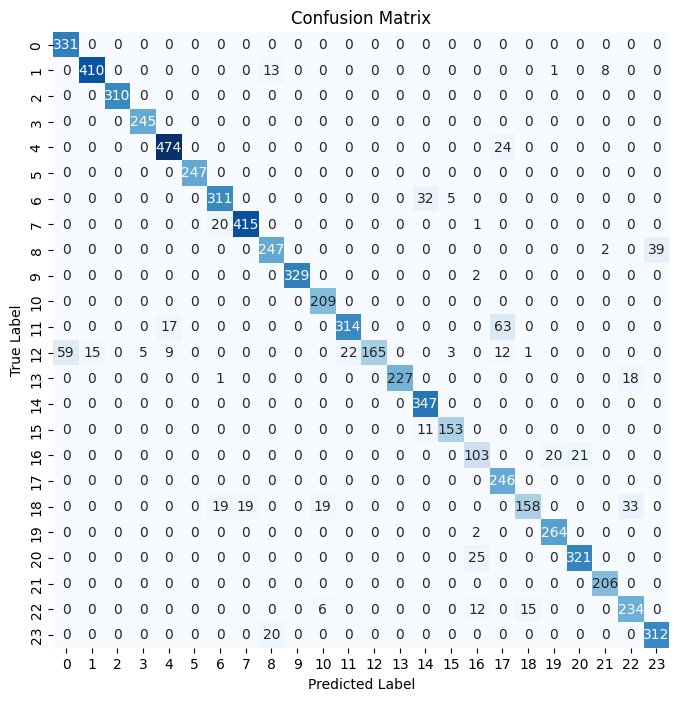

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       331
           1       0.96      0.95      0.96       432
           2       1.00      1.00      1.00       310
           3       0.98      1.00      0.99       245
           4       0.95      0.95      0.95       498
           5       1.00      1.00      1.00       247
           6       0.89      0.89      0.89       348
           7       0.96      0.95      0.95       436
           8       0.88      0.86      0.87       288
          10       1.00      0.99      1.00       331
          11       0.89      1.00      0.94       209
          12       0.93      0.80      0.86       394
          13       1.00      0.57      0.72       291
          14       1.00      0.92      0.96       246
          15       0.89      1.00      0.94       347
          16       0.95      0.93      0.94       164
          17       0.71      0.72      0.71       144
   

In [30]:

from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities for each class
y_prob = model.predict(X_test_reshaped)

# Get predicted labels
y_pred = np.argmax(y_prob, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

### References:

1. Sign Language MNIST. (2017, October 20). Kaggle. https://www.kaggle.com/datasets/datamunge/sign-language-mnist?resource=download
2. Intro to Machine Learning: Clustering: K-Means Cheatsheet | Codecademy. (n.d.). Codecademy. https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet
3. Banerji, A. (2023, August 3). K-Mean: Getting the optimal number of clusters. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
4. Sharma, P. (2023, November 3). The Ultimate Guide to K-Means Clustering: Definition, Methods and Applications. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
5. Gupta, A. (2022, January 30). Fuzzy C-Means Clustering (FCM) Algorithm - geek culture - medium. Medium. https://medium.com/geekculture/fuzzy-c-means-clustering-fcm-algorithm-in-machine-learning-c2e51e586fff
6. Sharma, P. (2023a, August 18). Basic introduction to Feed-Forward Network in Deep learning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/03/basic-introduction-to-feed-forward-network-in-deep-learning/
7. Convolutional Neural Network (CNN). (n.d.). TensorFlow. https://www.tensorflow.org/tutorials/images/cnn